In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### ARTIFICAL NEURAL NETWORK

In [2]:
df=pd.read_csv("D:\partiise section\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.iloc[: ,3:13]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
X=df.iloc[: ,3:13].values

In [9]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [10]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [11]:
#X=df[["CreditScore","Geography","Gender","Age",
     #"Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].values

In [12]:
y=df.iloc[ : ,-1].values    #y=df["Exited"].values

In [13]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### ENCODING THE CATEGORICAL 

In [14]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
X[:,2]=Label.fit_transform(X[: ,2])

In [15]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")

In [17]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [16]:
X=np.array(ct.fit_transform(X))

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [19]:
X = X[: , 1:] #avoding dummy variable trap 

In [20]:
X

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

### SPLITING THE DATA INTO TRAIN AND TEST DATA

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# BUILDING THE ANN

In [48]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [50]:
cls =Sequential()

In [51]:
cls.add(Dense(units=15,activation="relu",kernel_initializer='glorot_uniform',input_dim=11))
cls.add(Dropout(rate=0.1))                    #hidden layer 1

In [52]:
cls.add(Dense(units=12,activation="relu"))    #hidden layer 2
cls.add(Dropout(rate=0.1))

In [53]:
cls.add(Dense(units=1,activation="sigmoid"))

In [54]:
cls.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

# TRAINING THE ANN

In [55]:
cls.fit(x_train, y_train ,batch_size= 32, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6059 - accuracy: 0.6862
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7989
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8129
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8213
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8257
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8321
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8339
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8391
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8393
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8454

In [56]:
loss=pd.DataFrame(cls.history.history)

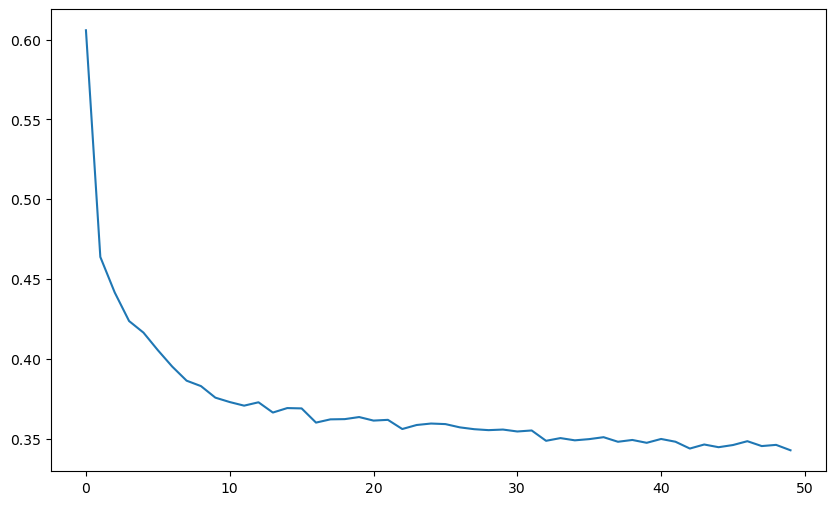

In [57]:
plt.figure(figsize=(10,6))
plt.plot(loss["loss"])

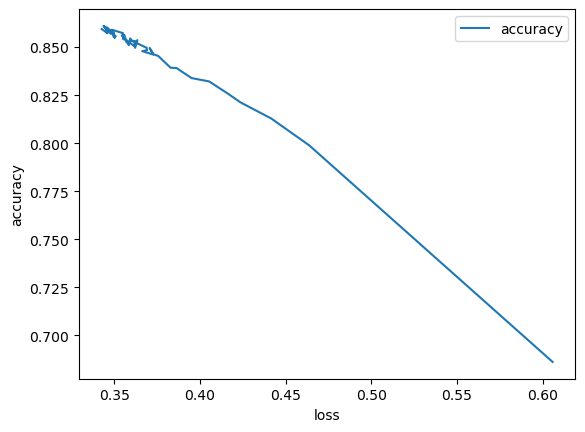

In [58]:
loss.plot("loss")
plt.xlabel("loss")
plt.ylabel("accuracy")
plt.show()

In [59]:
prd=cls.predict(x_test,verbose=0)

In [60]:
prd

array([[0.25596705],
       [0.28515342],
       [0.14692399],
       ...,
       [0.13907827],
       [0.18971306],
       [0.2557995 ]], dtype=float32)

In [61]:
prd=prd>=0.5

In [62]:
prd

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [63]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,prd)

In [64]:
cm

array([[1522,   73],
       [ 201,  204]], dtype=int64)

In [65]:
accuracy_score(y_test,prd)

0.863

<Axes: >

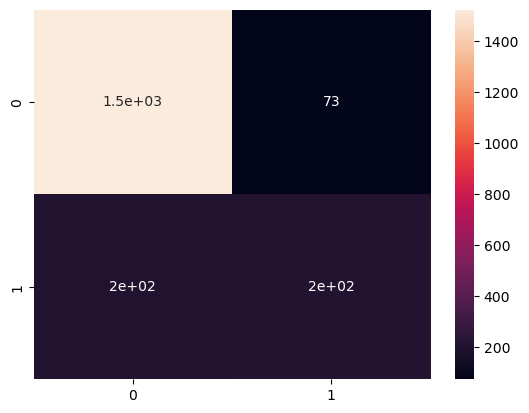

In [66]:
sns.heatmap(cm,annot=True)

### predicting for single new observation



Predict if the customer with the given information below will leave the bank or not:

Geography: Spain
2.Credit Score: 700 3.Gender: Female 4.Age: 35 5.Tenure: 4 6.Balance: 50000 7.Number of Products: 3 8.Has Credit Card: Yes 9.Is Active Member: Yes 10.Estimated Salary: 40000

In [67]:
new=cls.predict(sc.transform(np.array([[0.0,1.0,700,1,35,4,50000,3,1,1,40000]])),verbose=0)

In [68]:
new

array([[0.55340827]], dtype=float32)

In [69]:
new=new>=0.5

In [70]:
new

array([[ True]])